<a href="https://colab.research.google.com/github/aleksperic/Basketball-player-stats/blob/master/Basketball_player_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><i><u>Zavšni projekat Python kursa na <b>Comtrede Code Academy</b></h1>



<h3>U ovom projektu bavićemo se analizom podataka košarkaških igrača.
 
Data set je preuzet sa [Kaggle](https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues) web sajta i sadrži podatke igrača iz 49 svetskih košarkaških liga.


Na pocetku importujemo potrebne module za manipulaciju i predstavljanje informacija dobijenih iz podataka.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Učitavamo .csv fajl u DataFrame uz pomoć pandas biblioteke.

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/players_stats_by_season_full_details.csv')

Uz pomoć df.columns metode, dobijamo jasniju sliku koje sve kolome postoje u DataFrame-u.

In [3]:
df.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

.shape nam omogućava da vidimo koliko podataka se nalazi u DataFrame-u. Iz priloženog možemo videti da radimo sa 36950 redova i 31 kolonom.

In [4]:
df.shape

(36950, 31)

.info() nam daje informaciju o indeksima, kolonama, broju non null podataka i tipu podataka u koloni.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36950 entries, 0 to 36949
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   League       36950 non-null  object 
 1   Season       36950 non-null  object 
 2   Stage        36950 non-null  object 
 3   Player       36950 non-null  object 
 4   Team         36950 non-null  object 
 5   GP           36950 non-null  int64  
 6   MIN          36950 non-null  float64
 7   FGM          36950 non-null  int64  
 8   FGA          36950 non-null  int64  
 9   3PM          36950 non-null  int64  
 10  3PA          36950 non-null  int64  
 11  FTM          36950 non-null  int64  
 12  FTA          36950 non-null  int64  
 13  TOV          36950 non-null  int64  
 14  PF           36950 non-null  int64  
 15  ORB          36950 non-null  int64  
 16  DRB          36950 non-null  int64  
 17  REB          36950 non-null  int64  
 18  AST          36950 non-null  int64  
 19  STL 

Pomoću metode .head() možemo prikazti početak DataFrame-a, i videti strukturu podataka u DataFrame-u.

In [6]:
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Regular_Season,Kevin Durant,OKC,82,3239.3,794,1668,128,351,756,840,271,171,105,518,623,231,112,84,2472,1988.0,Sep,"Sep 29, 1988",6-9,206.0,240.0,109.0,United States,Montrose Christian School
1,NBA,2009 - 2010,Regular_Season,LeBron James,CLE,76,2965.6,768,1528,129,387,593,773,261,119,71,483,554,651,125,77,2258,1984.0,Dec,"Dec 30, 1984",6-8,203.0,250.0,113.0,United States,St. Vincent St. Mary High School
2,NBA,2009 - 2010,Regular_Season,Dwyane Wade,MIA,77,2792.4,719,1511,73,243,534,702,252,181,107,266,373,501,142,82,2045,1982.0,Jan,"Jan 17, 1982",6-4,193.0,220.0,100.0,United States,Harold L. Richards High School
3,NBA,2009 - 2010,Regular_Season,Dirk Nowitzki,DAL,81,3038.8,720,1496,51,121,536,586,149,208,80,540,620,218,70,79,2027,1978.0,Jun,"Jun 19, 1978",7-0,213.0,245.0,111.0,Germany,NaN
4,NBA,2009 - 2010,Regular_Season,Kobe Bryant,LAL,73,2835.4,716,1569,99,301,439,541,233,187,78,313,391,365,113,20,1970,1978.0,Aug,"Aug 23, 1978",6-6,198.0,212.0,96.0,United States,Lower Merion High School


In [7]:
df.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,height_cm,weight,weight_kg
count,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36950.000000,36774.000000,36912.000000,33919.000000,33919.000000
mean,31.401083,781.178506,117.838268,254.699648,30.616969,87.107876,57.238484,77.404980,49.160162,72.323978,35.362544,94.218106,129.580650,65.333424,27.635372,10.383735,323.544060,1987.492549,197.165827,209.275332,94.955836
std,16.112989,470.295971,91.730585,191.015086,30.658528,80.451297,53.446822,68.662186,34.383808,40.288340,35.028300,78.806687,109.112397,67.823130,20.710504,16.272083,248.591981,4.913384,8.630686,25.669331,11.643626
min,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1968.000000,160.000000,130.000000,59.000000
25%,22.000000,476.000000,57.000000,131.000000,7.000000,25.000000,23.000000,32.000000,26.000000,44.000000,13.000000,44.000000,59.000000,24.000000,13.000000,1.000000,160.000000,1984.000000,191.000000,190.000000,86.000000
50%,31.000000,726.000000,99.000000,217.000000,23.000000,71.000000,44.000000,61.000000,43.000000,69.000000,25.000000,75.000000,102.000000,45.000000,23.000000,5.000000,275.000000,1988.000000,198.000000,207.000000,94.000000
75%,38.000000,983.200000,151.000000,323.000000,45.000000,126.000000,75.000000,102.000000,65.000000,93.000000,47.000000,120.000000,166.000000,84.000000,37.000000,13.000000,417.000000,1991.000000,203.000000,225.000000,102.000000
max,83.000000,3239.300000,857.000000,1941.000000,402.000000,1028.000000,756.000000,916.000000,464.000000,332.000000,440.000000,848.000000,1247.000000,907.000000,191.000000,269.000000,2818.000000,2002.000000,229.000000,375.000000,170.000000


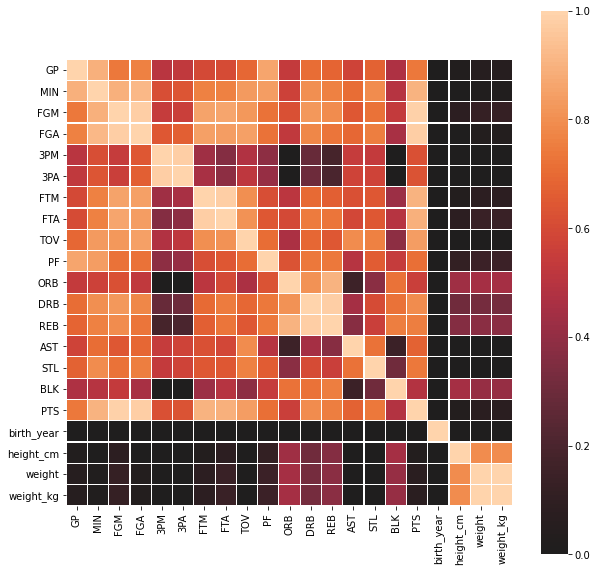

In [8]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmax = 1, vmin = 0, center = 0, square = True, linewidths = .2, xticklabels=True, yticklabels=True)
plt.show()

In [9]:
df['League'].unique()

array(['NBA', 'Euroleague', 'Israeli-BSL', 'Argentinian-Liga-A',
       'Australian-NBL', 'Austrian-A-Bundesliga', 'Balkan-BIBL',
       'Belarusian-BPL', 'Belgium-Scooore-League', 'Bosnian-BiH-Liga',
       'Brazilian-NBB', 'British-BBL', 'Bulgarian-NBL', 'Canadian-NBL',
       'Chinese-CBA', 'Croatian-A-1-Liga', 'Czech-NBL',
       'Danish-Basketligaen', 'Estonian-Latvian-Basketball-League',
       'Eurocup', 'FIBA-Europe-Cup', 'Finnish-Korisliiga',
       'French-Jeep-Elite', 'Georgian-Super-Liga', 'German-BBL',
       'Greek-HEBA-A1', 'Hungarian-NBIA', 'Italian-Lega-Basket-Serie-A',
       'Japanese-BLeague', 'Kosovo-FBK', 'Lebanese-Division-A',
       'Lithuanian-LKL', 'Luxembourg-Total-League',
       'Macedonian-Superleague', 'Mexican-LNBP', 'Netherlands-DBL',
       'New-Zealand-NBL', 'Norwegian-BLNO', 'Polish-TBL',
       'Romanian-Divizia-A', 'Serbian-KLS', 'Slovakian-Extraliga',
       'Slovenian-SKL', 'South-Korean-KBL', 'Spanish-ACB',
       'Swedish-Basketligan', 'Swiss-L

In [10]:
df['Stage'].unique()

array(['Regular_Season', 'Playoffs', 'International'], dtype=object)

In [11]:
df['Season'].unique()

array(['2009 - 2010', '2010 - 2011', '2011 - 2012', '2012 - 2013',
       '2013 - 2014', '2014 - 2015', '2015 - 2016', '2016 - 2017',
       '2017 - 2018', '2018 - 2019'], dtype=object)

Funkcija koja nam iz dataframe-a izdvaja novi dataframe grupisan po ligama, sezonama i fazama (stage) ukoliko je NBA liga u pitanju
<br>Funkcija kao agrument prima naziv lige, i opciono sezonu i stage. <br>Ukoliko argument sezona nije prosledjen, dobijamo dataframe u kome se nalaze podaci za sve sezone. <br>Ukoliko argument stage nije prosledjen, dobijamo dataframe po svim fazama takmicenja (regularne sezone i plejofa, vezano za NBA ligu).

In [12]:
def df_liga(liga, sezona=None, stage=None):
  if liga == 'NBA':
    if not stage:
      stage = input('Unesite koju fazu zelite ["Regular_Season", "Playoffs"] : ')
    if not sezona:
      return df[(df['League'] == liga) & (df['Stage'] == stage)].reset_index(drop=True)
    return df[(df['League'] == liga) & (df['Season'] == sezona) & (df['Stage'] == stage)].reset_index(drop=True)

  if not sezona:
    return df[(df['League'] == liga)].reset_index(drop=True)
  return df[(df['League'] == liga) & (df['Season'] == sezona)].reset_index(drop=True)

In [13]:
nba_regular = df_liga('NBA', stage='Regular_Season')

In [14]:
nba_regular_poslednja_sezona = df_liga('NBA', sezona='2018 - 2019', stage='Regular_Season')

In [15]:
nba_playoffs = df_liga('NBA', stage='Playoffs')

In [16]:
euroleague = df_liga('Euroleague')

In [17]:
euroleague_poslednja_sezona = df_liga('Euroleague', sezona='2018 - 2019')

In [18]:
eurocup = df_liga('Eurocup')

In [19]:
nba_regular['League'].unique()

array(['NBA'], dtype=object)

In [20]:
nba_playoffs['Stage'].unique()

array(['Playoffs'], dtype=object)

In [21]:
euroleague['League'].unique()

array(['Euroleague'], dtype=object)

In [22]:
eurocup['League'].unique()

array(['Eurocup'], dtype=object)

In [23]:
nba_regular.shape

(2326, 31)

In [24]:
nba_playoffs.shape

(1466, 31)

In [25]:
euroleague.shape

(1566, 31)

In [26]:
eurocup.shape

(2327, 31)

In [27]:
nba_regular.rename(columns={'height_cm': 'NBA height_cm', 'weight_kg': 'NBA weight_kg', 'nationality': 'NBA nationality'}, inplace=True)
euroleague.rename(columns={'height_cm': 'Euroleague height_cm', 'weight_kg': 'Euroleague weight_kg', 'nationality': 'Euroleague nationality'}, inplace=True)

In [28]:
visina_igraca_nba_euroleague = pd.DataFrame([nba_regular['Player'], nba_regular['NBA height_cm'], euroleague['Player'], euroleague['Euroleague height_cm']]).transpose()
visina_igraca_nba_euroleague.head()

,Player,NBA height_cm,Player,Euroleague height_cm
0,Kevin Durant,206,Linas Kleiza,203
1,LeBron James,203,Qyntel Woods,203
2,Dwyane Wade,193,Josh Childress,203
3,Dirk Nowitzki,213,Trajan Langdon,193
4,Kobe Bryant,198,Mirza Teletovic,206


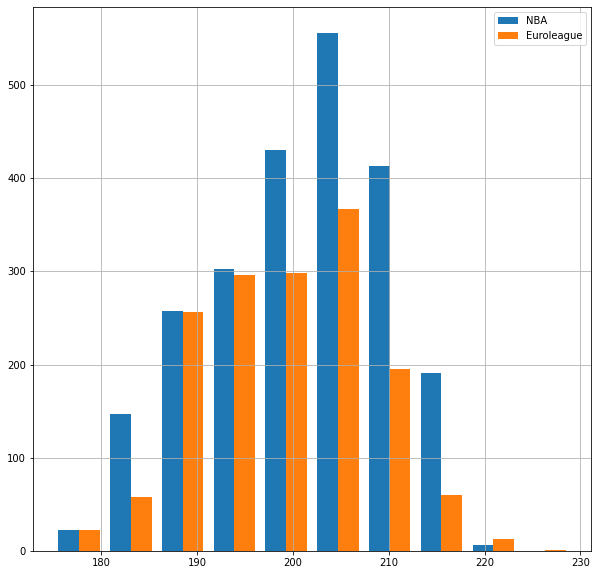

In [29]:
x = nba_regular['NBA height_cm']
y = euroleague['Euroleague height_cm']

plt.figure(figsize=(10,10))
plt.hist([x, y], label=['NBA', 'Euroleague'], bins=10)
plt.grid()
plt.legend()
plt.show()

In [30]:
tezina_igraca_nba_euroleague = pd.DataFrame([nba_regular['Player'], nba_regular['NBA weight_kg'], euroleague['Player'], euroleague['Euroleague weight_kg']]).transpose()
tezina_igraca_nba_euroleague.head()

,Player,NBA weight_kg,Player,Euroleague weight_kg
0,Kevin Durant,109,Linas Kleiza,106
1,LeBron James,113,Qyntel Woods,100
2,Dwyane Wade,100,Josh Childress,95
3,Dirk Nowitzki,111,Trajan Langdon,91
4,Kobe Bryant,96,Mirza Teletovic,110


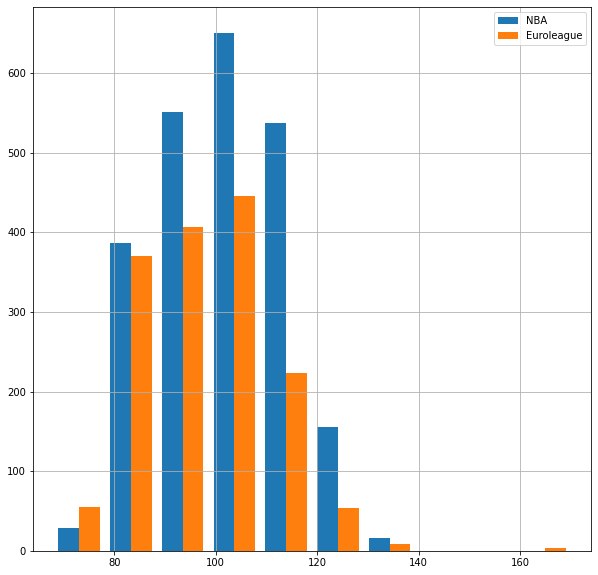

In [31]:
x = nba_regular['NBA weight_kg']
y = euroleague['Euroleague weight_kg']

plt.figure(figsize=(10,10))
plt.hist([x, y], label=['NBA', 'Euroleague'], bins=10)
plt.grid()
plt.legend()
plt.show()

In [32]:
df['nationality'].value_counts().head(10)

United States    12021
Serbia            1834
Croatia           1090
Lithuania          934
China              821
Argentina          793
France             745
Brazil             710
Spain              673
Slovenia           667
Name: nationality, dtype: int64

In [33]:
nba_regular['NBA nationality'].value_counts().head(10)

United States    1768
France             51
Canada             42
Spain              32
Australia          21
Argentina          20
Brazil             17
Germany            16
Turkey             16
Slovenia           16
Name: NBA nationality, dtype: int64

In [34]:
nba_regular_poslednja_sezona['nationality'].value_counts().head(10)

United States                  217
Canada                           7
Serbia                           4
Spain                            4
France                           4
Australia                        4
Germany                          3
Cameroon                         3
Croatia                          3
United States / Puerto Rico      2
Name: nationality, dtype: int64

In [35]:
nba_playoffs['nationality'].value_counts().loc['Serbia']

3

In [36]:
euroleague['Euroleague nationality'].value_counts().head(10)

United States    377
Lithuania        114
Spain            108
Greece            97
Serbia            89
Croatia           70
France            63
Turkey            55
Russia            52
Italy             40
Name: Euroleague nationality, dtype: int64

In [37]:
euroleague_poslednja_sezona['nationality'].value_counts().head(10)

United States    39
France           10
Serbia            9
Spain             8
Lithuania         6
Greece            6
Croatia           3
Argentina         3
Italy             3
Germany           3
Name: nationality, dtype: int64

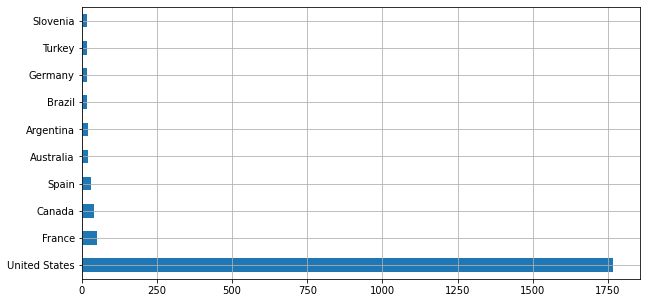

In [38]:
nba_regular['NBA nationality'].value_counts().head(10).plot(kind='barh', figsize=(10, 5))
plt.grid(True)
plt.show()

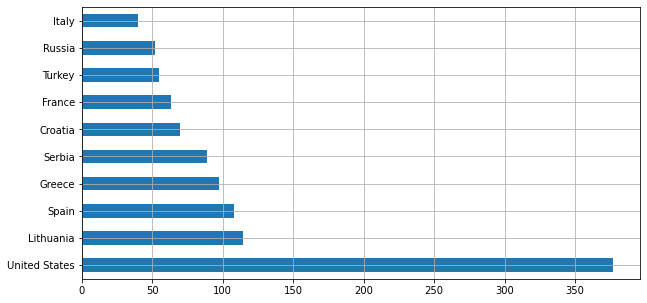

In [39]:
euroleague['Euroleague nationality'].value_counts().head(10).plot(kind='barh', figsize=(10, 5))
plt.grid(True)
plt.show()

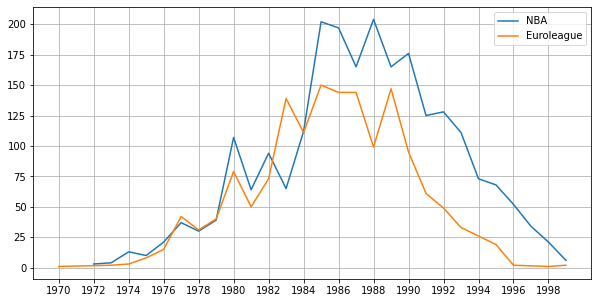

In [40]:
plt.figure(figsize=(10,5))
plt.plot(nba_regular['birth_year'].value_counts().sort_index(), label='NBA')
plt.plot(euroleague['birth_year'].value_counts().sort_index(),label='Euroleague')
plt.xticks(ticks=(range(1970, 2000, 2)))
plt.legend()
plt.grid(True)
plt.show()

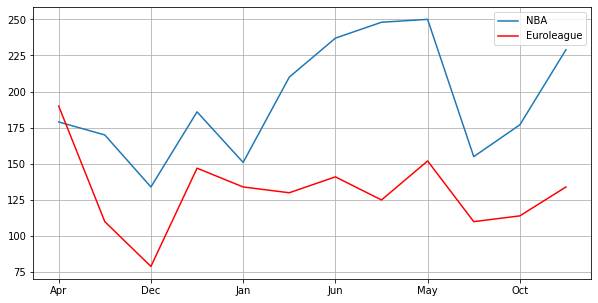

In [41]:
nba_regular['birth_month'].value_counts().sort_index().plot(kind='line', figsize=(10, 5), label='NBA')
euroleague['birth_month'].value_counts().sort_index().plot(kind='line', figsize=(10, 5), color='red', label="Euroleague")
plt.grid(True)
plt.legend()
plt.show()

In [42]:
# Grupisanje NBA po timovima i prosek njihovih numerickih vrednosti
nba_timovi = (nba_regular.groupby(['Team'], as_index=False))
nba_timovi.mean()

,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,NBA height_cm,weight,NBA weight_kg
0,ATL,71.602410,1859.936145,306.759036,662.493976,68.385542,189.265060,134.048193,176.373494,112.120482,146.180723,74.445783,252.120482,326.566265,193.759036,63.433735,38.530120,815.951807,1986.385542,200.469880,220.963855,100.240964
1,BOS,69.666667,1794.954444,291.888889,635.466667,65.855556,183.133333,133.833333,169.133333,100.444444,149.877778,68.400000,240.866667,309.266667,179.222222,59.633333,31.866667,783.466667,1987.077778,199.344444,224.111111,101.711111
2,BRK,73.203390,1839.647458,291.881356,641.254237,70.322034,197.593220,137.084746,181.050847,106.440678,148.508475,80.711864,246.135593,326.847458,164.101695,55.779661,34.118644,791.169492,1988.033898,201.288136,223.406780,101.389831
3,CHA,73.238806,1927.502985,298.895522,673.552239,69.134328,195.776119,147.761194,189.223881,99.044776,135.373134,71.552239,255.447761,327.000000,185.119403,56.671642,38.477612,814.686567,1988.686567,199.761194,219.626866,99.656716
4,CHI,70.412500,1809.420000,279.987500,619.375000,50.662500,140.962500,131.437500,171.937500,96.800000,138.362500,91.337500,251.925000,343.262500,162.475000,52.050000,39.900000,742.075000,1986.725000,201.925000,225.537500,102.237500
5,CLE,69.632911,1810.910127,293.962025,635.468354,71.772152,192.734177,136.291139,181.582278,101.582278,142.443038,83.683544,248.645570,332.329114,167.012658,50.569620,30.000000,795.987342,1986.936709,201.873418,226.518987,102.822785
6,DAL,72.888889,1857.632099,294.962963,647.666667,69.925926,195.246914,132.950617,168.728395,96.839506,141.629630,72.222222,245.604938,317.827160,176.283951,58.419753,31.580247,792.802469,1984.506173,200.172840,219.876543,99.703704
7,DEN,73.681159,1964.228986,330.275362,699.971014,72.695652,202.144928,155.420290,206.666667,113.855072,163.159420,92.811594,265.840580,358.652174,205.188406,63.695652,39.347826,888.666667,1988.159420,200.463768,220.014493,99.739130
8,DET,73.402778,1940.277778,308.652778,684.083333,61.291667,175.277778,131.375000,186.236111,102.763889,156.138889,103.277778,266.472222,369.750000,162.277778,58.541667,35.166667,809.972222,1988.472222,201.430556,228.291667,103.527778
9,GSW,71.920455,1771.556818,315.500000,661.431818,84.579545,213.840909,128.909091,160.579545,109.795455,144.454545,66.284091,241.818182,308.102273,203.488636,62.090909,37.193182,844.488636,1987.261364,201.284091,219.727273,99.693182


In [43]:
# Grupisanje evrolige po timovima i prosek njihovih numerickih vrednosti
euroleague_timovi = (euroleague.groupby(['Team'], as_index=False))
euroleague_timovi.mean()

,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,Euroleague height_cm,weight,Euroleague weight_kg
0,BAY,19.000000,387.915625,55.375000,118.656250,15.281250,40.968750,26.312500,33.687500,21.437500,40.000000,17.531250,42.343750,59.875000,31.281250,11.593750,3.687500,152.343750,1987.687500,199.250000,218.625000,99.218750
1,BBB,18.909091,361.954545,50.090909,104.454545,11.818182,35.000000,25.181818,31.727273,23.636364,41.545455,14.454545,39.909091,54.363636,27.090909,10.181818,4.181818,137.000000,1982.000000,197.727273,219.272727,99.454545
2,BER,21.894737,462.189474,62.473684,133.631579,13.526316,36.684211,27.263158,36.157895,32.105263,52.263158,20.157895,48.052632,68.210526,35.631579,13.421053,4.052632,165.736842,1985.631579,198.263158,214.789474,97.473684
3,BES,20.200000,406.890000,48.100000,114.200000,14.600000,44.000000,22.000000,34.200000,27.600000,38.800000,17.000000,40.800000,57.800000,26.400000,11.000000,6.000000,132.800000,1984.400000,197.500000,214.100000,97.100000
4,BRO,20.187500,446.972917,62.145833,132.687500,18.729167,48.145833,31.375000,40.145833,26.645833,47.125000,14.770833,48.166667,62.937500,36.854167,11.312500,5.479167,174.270833,1986.729167,198.375000,214.833333,97.479167
5,BUD,16.461538,380.123077,51.769231,118.307692,15.461538,40.230769,19.461538,25.769231,21.000000,35.153846,13.538462,37.538462,51.076923,29.000000,12.307692,4.076923,138.461538,1987.923077,199.923077,212.307692,96.307692
6,CAJ,25.593750,579.993750,86.312500,183.312500,26.093750,70.468750,39.656250,51.609375,34.781250,53.703125,24.890625,66.656250,91.546875,51.062500,17.359375,7.953125,238.437500,1987.187500,199.265625,213.968750,97.062500
7,CAN,15.500000,356.137500,43.875000,101.875000,14.500000,39.000000,25.000000,30.500000,18.875000,38.875000,13.125000,37.500000,50.625000,28.750000,8.000000,3.875000,127.500000,1982.000000,198.500000,216.875000,98.375000
8,CED,16.615385,391.161538,57.692308,127.538462,16.461538,47.153846,23.846154,31.769231,26.846154,34.846154,14.615385,41.153846,55.769231,35.000000,11.076923,1.538462,155.692308,1988.846154,198.615385,207.615385,94.230769
9,CHO,9.666667,245.883333,34.000000,78.166667,5.500000,18.333333,16.666667,24.166667,16.833333,24.833333,16.833333,25.500000,42.333333,17.333333,6.333333,4.333333,90.500000,1983.000000,198.166667,208.500000,94.666667


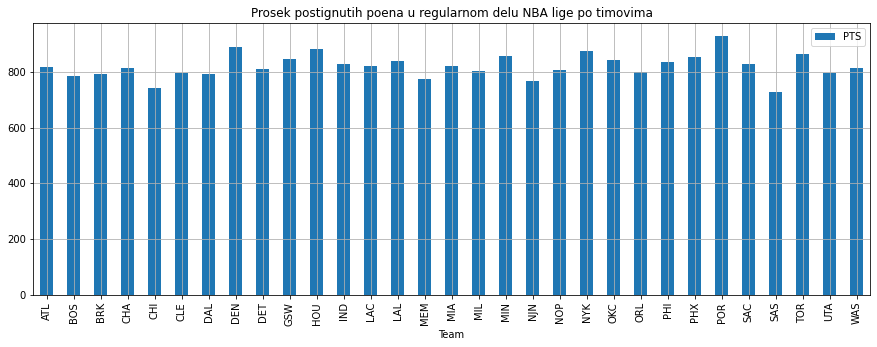

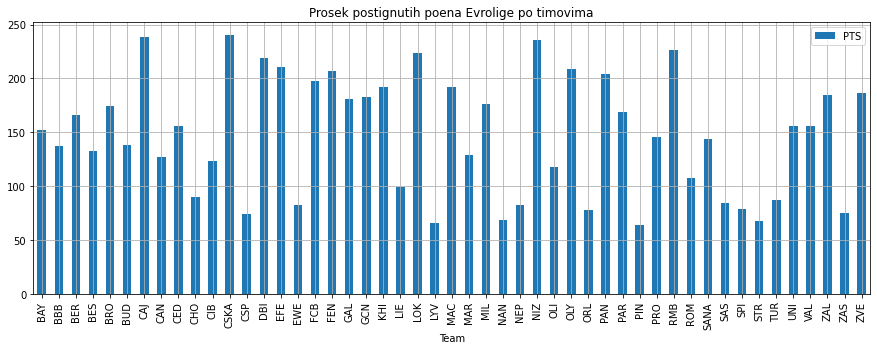

In [44]:
nba_timovi.mean().plot(x='Team', kind='bar', y=['PTS'], figsize=(15,5), grid=True, title="Prosek postignutih poena u regularnom delu NBA lige po timovima")
euroleague_timovi.mean().plot(x='Team', kind='bar', y=['PTS'], figsize=(15,5), grid=True, title="Prosek postignutih poena Evrolige po timovima")
plt.show()

In [45]:
nba_regular_poslednja_sezona.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2018 - 2019,Regular_Season,James Harden,HOU,78,2866.7,843,1909,378,1028,754,858,387,244,66,452,518,586,158,58,2818,1989.0,Aug,"Aug 26, 1989",6-5,196.0,220.0,100.0,United States,Artesia High School
1,NBA,2018 - 2019,Regular_Season,Paul George,OKC,77,2841.4,707,1614,292,757,453,540,205,214,105,523,628,318,170,34,2159,1990.0,May,"May 2, 1990",6-9,206.0,220.0,100.0,United States,Pete Knight High School
2,NBA,2018 - 2019,Regular_Season,Kemba Walker,CHA,82,2862.6,731,1684,260,731,380,450,211,131,52,309,361,484,102,34,2102,1990.0,May,"May 8, 1990",6-1,185.0,184.0,83.0,United States,Rice High School
3,NBA,2018 - 2019,Regular_Season,Bradley Beal,WAS,82,3027.8,764,1609,209,596,362,448,224,226,89,322,411,448,121,58,2099,1993.0,Jun,"Jun 28, 1993",6-3,191.0,207.0,94.0,United States,Chaminade College Preparatory School
4,NBA,2018 - 2019,Regular_Season,Damian Lillard,POR,80,2837.9,681,1533,237,643,468,513,212,148,68,303,371,551,88,34,2067,1990.0,Jul,"Jul 15, 1990",6-3,191.0,195.0,88.0,United States,Oakland High School


In [46]:
euroleague_poslednja_sezona.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,Euroleague,2018 - 2019,International,Mike James,MIL,30,1018.8,189,468,70,215,147,178,77,77,11,103,114,191,39,1,595,1990.0,Aug,"Aug 18, 1990",6-1,185.0,190.0,86.0,United States,Grant High School
1,Euroleague,2018 - 2019,International,Nando De Colo,CSKA,34,823.9,160,320,59,137,122,129,70,60,16,68,84,116,32,0,501,1987.0,Jun,"Jun 23, 1987",6-5,196.0,195.0,88.0,France,NaN
2,Euroleague,2018 - 2019,International,Brandon Davies,ZAL,34,823.1,176,315,0,0,131,172,65,99,62,124,186,67,33,15,483,1991.0,Jul,"Jul 25, 1991",6-8,203.0,240.0,109.0,United States,Provo High School
3,Euroleague,2018 - 2019,International,Cory Higgins,CSKA,32,813.7,156,317,51,104,113,126,43,80,18,52,70,58,13,8,476,1989.0,Jun,"Jun 14, 1989",6-5,196.0,181.0,82.0,United States,Monte Vista High School
4,Euroleague,2018 - 2019,International,Will Clyburn,CSKA,35,944.5,162,342,34,99,117,157,49,66,59,179,238,51,36,6,475,1990.0,May,"May 17, 1990",6-6,198.0,210.0,95.0,United States,Romulus High School


In [47]:
# Grupisanje dataframe-a po igracima
nba_igraci = nba_regular.groupby(['Player'], as_index=False)
nba_igraci.mean()

,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,NBA height_cm,weight,NBA weight_kg
0,Aaron Brooks,75.250000,1813.725000,318.250000,757.250000,118.500000,303.500000,126.250000,151.750000,143.000000,156.750000,36.750000,110.750,147.500000,263.250000,50.00,12.750000,881.250000,1985.0,183.0,161.0,73.0
1,Aaron Gordon,73.500000,2175.725000,378.000000,838.750000,88.750000,274.500000,156.750000,222.000000,106.000000,152.000000,121.500000,364.250,485.750000,175.750000,60.00,49.000000,1001.500000,1995.0,206.0,220.0,100.0
2,Abdel Nader,54.500000,607.500000,70.500000,182.000000,27.500000,82.500000,25.000000,37.500000,30.000000,56.500000,13.500000,80.000,93.500000,23.000000,17.50,11.000000,193.500000,1993.0,198.0,225.0,102.0
3,Al Harrington,69.666667,1873.600000,358.000000,826.000000,119.333333,346.666667,148.333333,203.333333,116.666667,197.333333,78.666667,297.000,375.666667,99.666667,53.00,16.000000,983.666667,1980.0,206.0,245.0,111.0
4,Al Horford,74.750000,2462.212500,467.250000,889.750000,45.125000,121.750000,123.375000,160.750000,118.000000,158.375000,151.250000,457.125,608.375000,270.125000,60.75,89.875000,1103.000000,1986.0,208.0,245.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,Zach LaVine,74.000000,2122.033333,416.333333,923.666667,100.000000,268.000000,207.333333,251.666667,187.666667,163.666667,31.333333,214.000,245.333333,270.000000,61.00,17.666667,1140.000000,1995.0,196.0,208.0,94.0
651,Zach Lofton,1.000000,3.800000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,0.000000,1.00,0.000000,0.000000,1992.0,193.0,180.0,82.0
652,Zach Randolph,72.750000,2337.550000,495.000000,1039.000000,14.000000,53.125000,220.250000,289.000000,141.750000,170.875000,239.250000,483.750,723.000000,145.500000,56.25,20.000000,1224.250000,1981.0,206.0,260.0,118.0
653,Zaza Pachulia,71.375000,1353.125000,156.625000,322.500000,0.000000,2.125000,119.125000,157.375000,84.500000,166.500000,145.500000,266.625,412.125000,102.125000,49.75,23.875000,432.375000,1984.0,211.0,270.0,122.0


In [48]:
euroleague_igraci = euroleague.groupby(['Player'], as_index=False)
euroleague_igraci.mean()

,Player,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS,birth_year,Euroleague height_cm,weight,Euroleague weight_kg
0,A.J. Ogilvy,15.000000,134.30,19.000000,42.000000,0.0,0.000000,20.00,32.000000,11.00,15.000000,9.000000,17.00,26.000000,3.000000,5.00,10.000000,58.000000,1988.0,211.0,250.0,113.0
1,A.J. Slaughter,23.000000,523.80,80.000000,206.000000,40.0,109.000000,24.00,30.000000,27.00,56.000000,6.000000,40.00,46.000000,39.000000,10.00,1.000000,224.000000,1987.0,193.0,185.0,84.0
2,Aaron Cel,8.000000,166.80,23.000000,48.000000,6.0,18.000000,0.00,0.000000,6.00,17.000000,11.000000,24.00,35.000000,7.000000,4.00,2.000000,52.000000,1987.0,203.0,212.0,96.0
3,Aaron Craft,4.000000,67.40,3.000000,9.000000,0.0,2.000000,0.00,0.000000,5.00,10.000000,4.000000,3.00,7.000000,9.000000,2.00,0.000000,6.000000,1991.0,188.0,195.0,88.0
4,Aaron Doornekamp,30.000000,667.50,54.000000,157.000000,33.0,100.000000,37.00,46.000000,18.00,66.000000,25.000000,90.00,115.000000,46.000000,23.00,8.000000,178.000000,1985.0,201.0,212.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,Zakhar Pashutin,12.000000,67.50,5.000000,13.000000,2.0,5.000000,0.00,0.000000,3.00,13.000000,1.000000,8.00,9.000000,3.000000,3.00,1.000000,12.000000,1974.0,193.0,209.0,95.0
688,Zanis Peiners,28.000000,490.70,60.000000,112.000000,9.0,30.000000,57.00,66.000000,36.00,41.000000,15.000000,37.00,52.000000,43.000000,12.00,6.000000,186.000000,1990.0,203.0,212.0,96.0
689,Zoran Dragic,22.666667,421.10,63.666667,146.333333,18.0,58.333333,31.00,45.333333,21.00,46.333333,22.333333,40.00,62.333333,21.333333,17.00,1.333333,176.333333,1989.0,196.0,200.0,91.0
690,Zoran Erceg,19.500000,465.60,63.250000,153.750000,29.0,81.250000,43.50,48.000000,17.25,34.750000,19.250000,57.00,76.250000,19.000000,15.00,3.500000,199.000000,1985.0,206.0,247.0,112.0


In [49]:
nba_regular.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'NBA height_cm', 'weight', 'NBA weight_kg', 'NBA nationality',
       'high_school'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


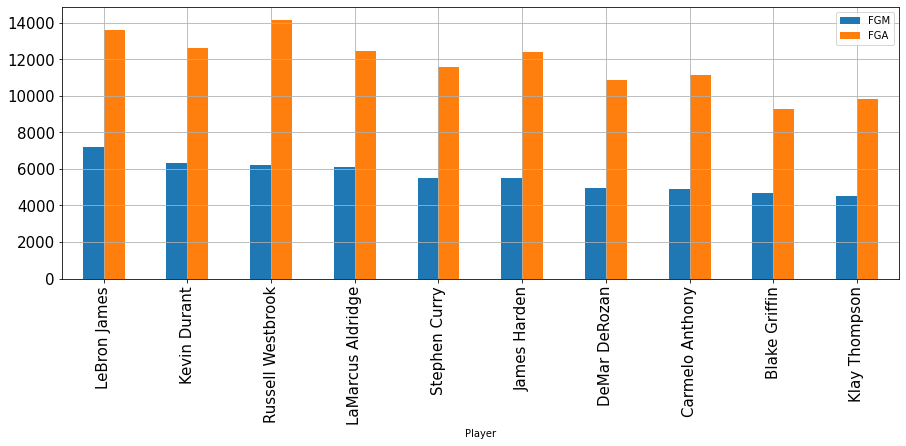

In [50]:
# Izdvajanje prvih 10 igraca sa najvise postignutih poena (FGM) sumiranih po svim sezonama, sortirani opadajuce 
# Njihov prikaz na grafiku (broj postignutih poena (FGM) u odnosu na broj pokusanih (FGA))
igraci_sa_najvise_poena_nba = nba_igraci['Player', 'FGM', 'FGA'].sum().sort_values('FGM', ascending=False).head(10)
igraci_sa_najvise_poena_nba.plot(x='Player', kind='bar', figsize=(15,5), grid=True, fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


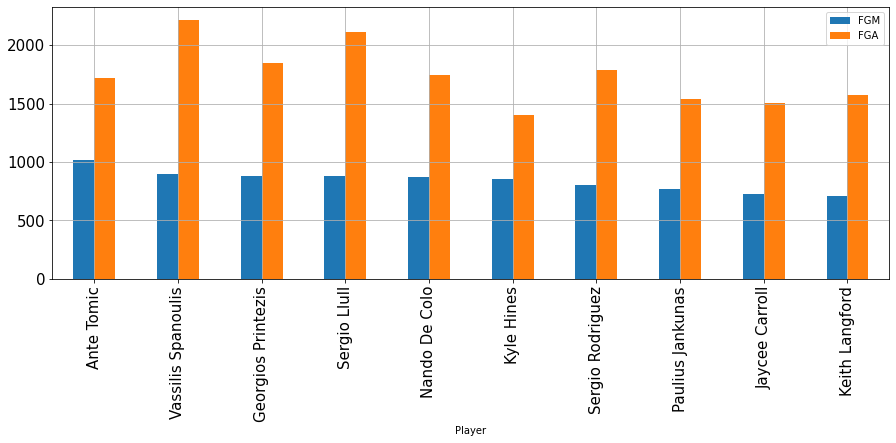

In [51]:
igraci_sa_najvise_poena_eu = euroleague_igraci['Player', 'FGM', 'FGA'].sum().sort_values('FGM', ascending=False).head(10)
igraci_sa_najvise_poena_eu.plot(x='Player', kind='bar', figsize=(15,5), grid=True, fontsize=15)
plt.show()

In [52]:
# Igrac sa najvise postignutih poena u NBA ligi
igraci_sa_najvise_poena_nba.iloc[0]

Player    LeBron James
FGM               7191
FGA              13602
Name: 393, dtype: object

In [53]:
# Igrac sa najvise postignutih poena u Evroligi
igraci_sa_najvise_poena_eu.iloc[0]

Player    Ante Tomic
FGM             1020
FGA             1720
Name: 51, dtype: object

In [54]:
# U dataset dodajemo kolonu '%' u prikazujemo procenat broj postignutih poena u odnosu na broj pokusanih izrazen u priocentima
igraci_sa_najvise_poena_nba['%'] = round((igraci_sa_najvise_poena_nba['FGM'] / igraci_sa_najvise_poena_nba['FGA']) * 100, 2)
igraci_sa_najvise_poena_nba.head(10).reset_index(drop=True)

,Player,FGM,FGA,%
0,LeBron James,7191,13602,52.87
1,Kevin Durant,6328,12636,50.08
2,Russell Westbrook,6190,14158,43.72
3,LaMarcus Aldridge,6125,12443,49.22
4,Stephen Curry,5504,11553,47.64
5,James Harden,5499,12411,44.31
6,DeMar DeRozan,4938,10855,45.49
7,Carmelo Anthony,4915,11147,44.09
8,Blake Griffin,4660,9281,50.21
9,Klay Thompson,4512,9823,45.93


In [55]:
igraci_sa_najvise_poena_eu['%'] = round((igraci_sa_najvise_poena_eu['FGM'] / igraci_sa_najvise_poena_eu['FGA']) * 100, 2)
igraci_sa_najvise_poena_eu.head(10).reset_index(drop=True)

,Player,FGM,FGA,%
0,Ante Tomic,1020,1720,59.30
1,Vassilis Spanoulis,895,2215,40.41
2,Georgios Printezis,883,1847,47.81
3,Sergio Llull,883,2116,41.73
4,Nando De Colo,874,1743,50.14
5,Kyle Hines,858,1405,61.07
6,Sergio Rodriguez,805,1785,45.10
7,Paulius Jankunas,771,1541,50.03
8,Jaycee Carroll,723,1502,48.14
9,Keith Langford,707,1578,44.80


In [56]:
# Sortiranje igraca koji imaju najbolji procenat suta u NBA ligi
igraci_sa_najvise_poena_nba.sort_values('%', ascending=False).reset_index(drop=True)

,Player,FGM,FGA,%
0,LeBron James,7191,13602,52.87
1,Blake Griffin,4660,9281,50.21
2,Kevin Durant,6328,12636,50.08
3,LaMarcus Aldridge,6125,12443,49.22
4,Stephen Curry,5504,11553,47.64
5,Klay Thompson,4512,9823,45.93
6,DeMar DeRozan,4938,10855,45.49
7,James Harden,5499,12411,44.31
8,Carmelo Anthony,4915,11147,44.09
9,Russell Westbrook,6190,14158,43.72


In [57]:
igraci_sa_najvise_poena_eu.sort_values('%', ascending=False).reset_index(drop=True)

,Player,FGM,FGA,%
0,Kyle Hines,858,1405,61.07
1,Ante Tomic,1020,1720,59.30
2,Nando De Colo,874,1743,50.14
3,Paulius Jankunas,771,1541,50.03
4,Jaycee Carroll,723,1502,48.14
5,Georgios Printezis,883,1847,47.81
6,Sergio Rodriguez,805,1785,45.10
7,Keith Langford,707,1578,44.80
8,Sergio Llull,883,2116,41.73
9,Vassilis Spanoulis,895,2215,40.41


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


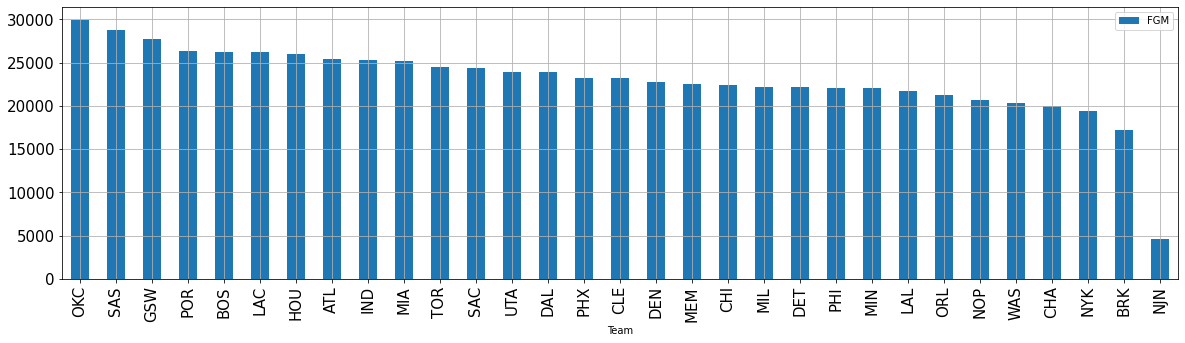

In [58]:
#Prikaz timova NBA lige koji su postigli najvise poena
timovi_sa_najvise_poena_nba = nba_timovi['Team', 'FGM'].sum().sort_values('FGM', ascending=False)
timovi_sa_najvise_poena_nba.plot(x='Team', kind='bar', figsize=(20,5), grid=True, fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


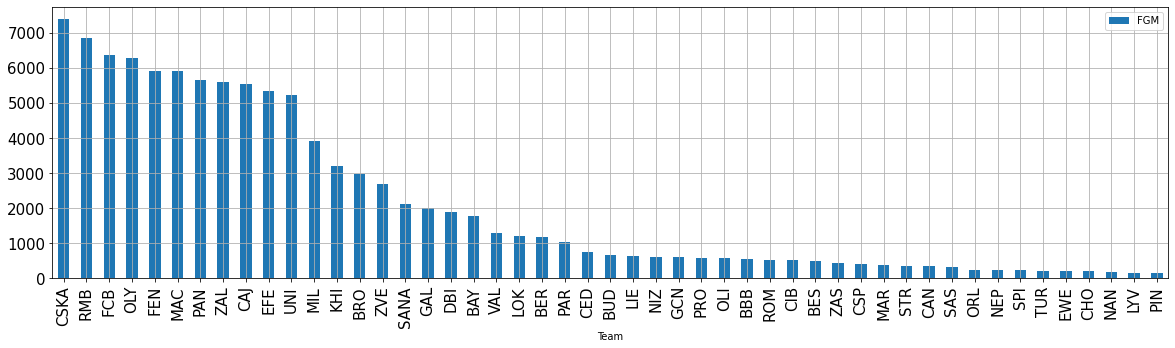

In [59]:
timovi_sa_najvise_poena_eu = euroleague_timovi['Team', 'FGM'].sum().sort_values('FGM', ascending=False)
timovi_sa_najvise_poena_eu.plot(x='Team', kind='bar', figsize=(20,5), grid=True, fontsize=15)
plt.show()

In [60]:
# Funkcija koja nam vraca DataFrame igraca, ukupno odigranih utakmica, ukupno odigranih minuta, i prosek minuta po utakmici
# Ukoliko argument 'sezona' nije prosledjen, funkcija vraca rezultat za sve sezone
# Ukoliko zelimo da vidimo po odredjenoj sezoni, prosledjujemo argument u formatu npr. '2012 - 2013'

def minuti_utakmice_igraca(liga, sezona=None, stage=None):
  if sezona is None:
    if stage is None:
      min_ut = df[(df['League'] == liga)]
    min_ut = df[(df['League'] == liga) & (df['Stage'] == stage)]
  else:
    if stage is None:
      min_ut = df[(df['League'] == liga) & (df['Season'] == sezona)]
    min_ut = df[(df['League'] == liga) & (df['Stage'] == stage) & (df['Season'] == sezona)]

  min_ut_igraca = min_ut.groupby(['Player'], as_index=False)
  ukupno_min_ut = min_ut_igraca['GP', 'MIN'].sum().sort_values(by=['Player', 'GP', 'MIN']).reset_index(drop=True).set_index('Player')
  ukupno_min_ut['Prosek minuta'] = round(ukupno_min_ut['MIN'] / ukupno_min_ut['GP'], 2)
  ukupno_min_ut = ukupno_min_ut.sort_values('Prosek minuta', ascending=False)
  return ukupno_min_ut
  

In [61]:
# Ukupno odigranih utakmica, ukupno minuta i prosek minuta igraca NBA lige za sve sezone
minuti_nba_igraca = minuti_utakmice_igraca('NBA', stage='Regular_Season')
minuti_nba_igraca

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


,GP,MIN,Prosek minuta
Player,,,
Kobe Bryant,291,10858.9,37.32
LeBron James,726,27093.6,37.32
Brandon Roy,65,2418.5,37.21
Kevin Durant,668,24738.6,37.03
Luol Deng,427,15704.8,36.78
...,...,...,...
Georges Niang,59,516.3,8.75
Sasha Vujacic,67,574.9,8.58
Cole Aldrich,62,531.0,8.56


In [62]:
minuti_eu_igraca = minuti_utakmice_igraca('Euroleague', stage='International')
minuti_eu_igraca

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


,GP,MIN,Prosek minuta
Player,,,
Vlado Ilijevski,15,522.2,34.81
Kenny Gregory,16,553.6,34.60
Bobby Brown,24,782.9,32.62
Sammy Mejia,10,324.0,32.40
Josh Childress,20,647.0,32.35
...,...,...,...
Moran Roth,18,109.2,6.07
Zakhar Pashutin,12,67.5,5.62
Vassilis Xanthopoulos,15,58.1,3.87


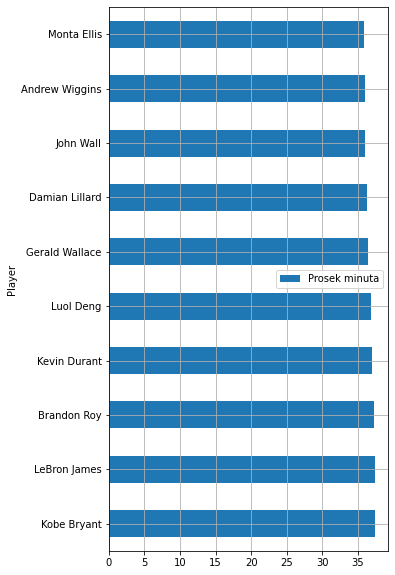

In [63]:
minuti_nba_igraca.head(10).plot(y='Prosek minuta', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()

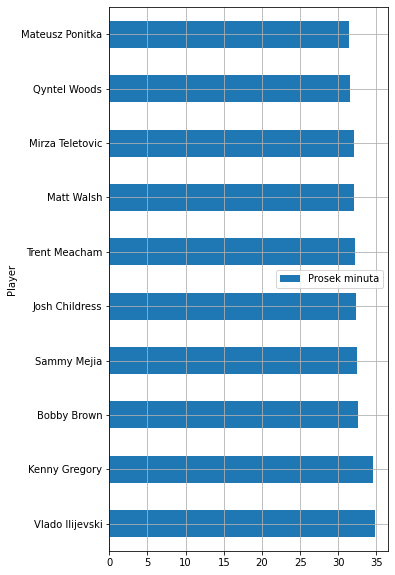

In [64]:
minuti_eu_igraca.head(10).plot(y='Prosek minuta', kind='barh', figsize=(5, 10))
plt.grid(True)
plt.show()

In [65]:
x = minuti_utakmice_igraca('NBA',sezona='2018 - 2019', stage='Regular_Season')
y = minuti_utakmice_igraca('NBA',sezona='2018 - 2019', stage='Playoffs')
y.rename(columns={'GP': 'GP Playoff','MIN': 'MIN Playoff', 'Prosek minuta': 'Prosek minuta Playoff'}, inplace=True)
xy = pd.concat([x, y], axis=1).sort_index().dropna()
xy = xy.sort_values(by='Prosek minuta', ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


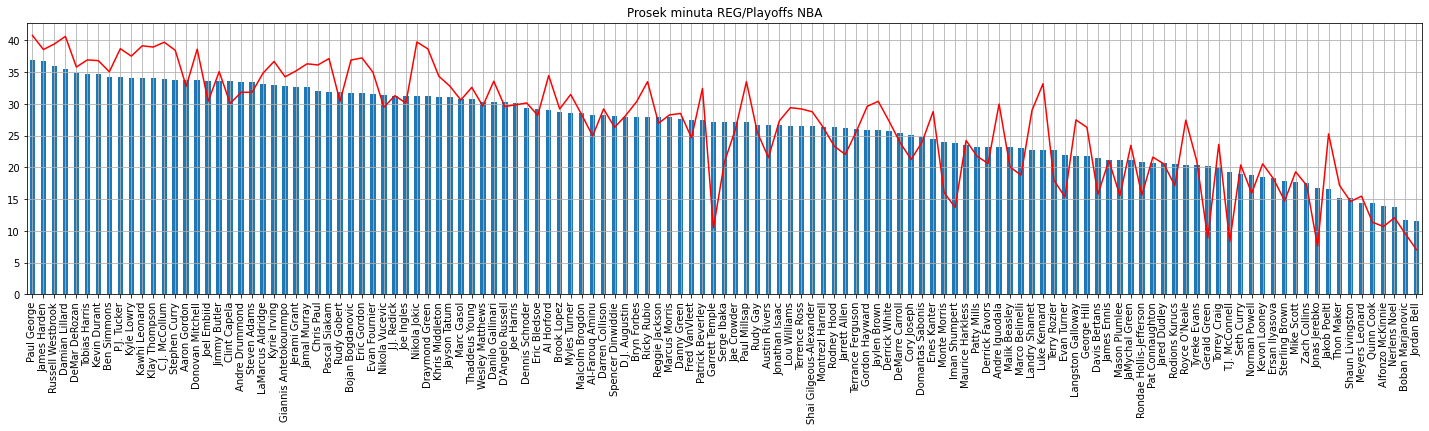

In [66]:
xy['Prosek minuta'].plot(kind='bar', use_index=True,figsize=(25,5), title='Prosek minuta REG/Playoffs NBA')
xy['Prosek minuta Playoff'].plot(kind='line', color='red', rot=90)
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


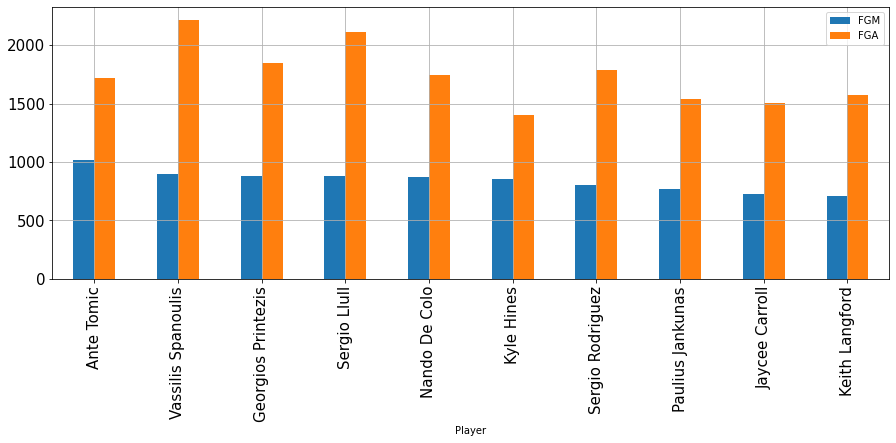

In [67]:
igraci_sa_najvise_poena_eu = euroleague_igraci['Player', 'FGM', 'FGA'].sum().sort_values('FGM', ascending=False).head(10)
igraci_sa_najvise_poena_eu.plot(x='Player', kind='bar', figsize=(15,5), grid=True, fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


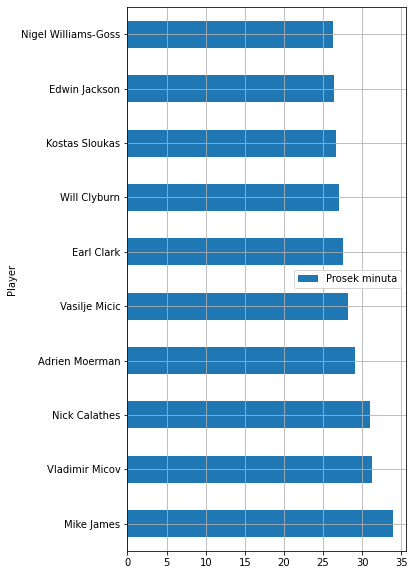

In [68]:
min_ut_eu = minuti_utakmice_igraca('Euroleague', sezona='2018 - 2019', stage='International')
min_ut_eu.head(10).plot(y='Prosek minuta', kind='barh', figsize=(5, 10), grid=True)
plt.show()

In [69]:
minuti_utakmice_igraca('NBA',sezona='2018 - 2019', stage='Regular_Season').loc['Nikola Jokic']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


GP                 80.0
MIN              2503.9
Prosek minuta      31.3
Name: Nikola Jokic, dtype: float64

In [70]:
minuti_utakmice_igraca('NBA',sezona='2018 - 2019', stage='Regular_Season').loc['Bogdan Bogdanovic']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


GP                 70.00
MIN              1947.10
Prosek minuta      27.82
Name: Bogdan Bogdanovic, dtype: float64

In [71]:
minuti_utakmice_igraca('NBA',sezona='2018 - 2019', stage='Regular_Season').loc['Boban Marjanovic']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  app.launch_new_instance()


GP                58.00
MIN              680.70
Prosek minuta     11.74
Name: Boban Marjanovic, dtype: float64

In [72]:
# NBA timovi sa najboljim procentum suta za 3 poena, sortirani opadajuce
nba_najvise_trojki = nba_timovi['Team', '3PM', '3PA'].sum()
nba_najvise_trojki['%'] = round((nba_najvise_trojki['3PM'] / nba_najvise_trojki['3PA']) * 100, 2)
x = nba_najvise_trojki.sort_values('%', ascending=False).reset_index(drop=True)
x.rename(columns={'%': '% NBA'}, inplace=True)
x

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Team,3PM,3PA,% NBA
0,GSW,7443,18818,39.55
1,SAS,5996,15711,38.16
2,CLE,5670,15226,37.24
3,IND,5061,13769,36.76
4,LAC,5650,15373,36.75
5,WAS,4241,11608,36.54
6,SAC,4562,12510,36.47
7,MIA,5143,14167,36.30
8,NYK,4373,12082,36.19
9,HOU,7698,21290,36.16


In [73]:
# NBA timovi sa najboljim procentum suta za 3 poena, sortirani opadajuce
eu_najvise_trojki = euroleague_timovi['Team', '3PM', '3PA'].sum()
eu_najvise_trojki['%'] = round((eu_najvise_trojki['3PM'] / eu_najvise_trojki['3PA']) * 100, 2)
y = eu_najvise_trojki.sort_values('%', ascending=False).reset_index(drop=True)
y.rename(columns={'%': '% EU'}, inplace=True)
y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Team,3PM,3PA,% EU
0,CSKA,2119,5170,40.99
1,NIZ,182,457,39.82
2,BRO,899,2311,38.90
3,FEN,1563,4065,38.45
4,BUD,201,523,38.43
5,MAR,98,258,37.98
6,ZAL,1583,4177,37.90
7,SANA,645,1704,37.85
8,VAL,406,1073,37.84
9,CSP,137,363,37.74


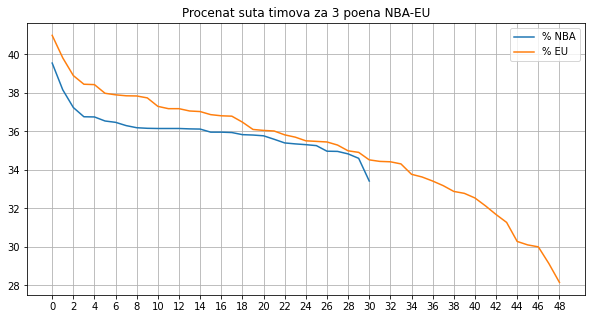

In [74]:
x['% NBA'].plot(figsize=(10,5), title='Procenat suta timova za 3 poena NBA-EU')
y['% EU'].plot()
plt.xticks( ticks=(range(0,50,2)))
plt.legend()
plt.grid()
plt.show()

In [75]:
# Funkcija ppg (Points per game) nam vraca DataFrame igraca, ukupno odigranih utakmica, ukupno postignutih poena, i prosek poena po utakmici
# Ukoliko argument 'sezona' nije prosledjen, funkcija vraca rezultat za sve sezone
# Ukoliko zelimo da vidimo po odredjenoj sezoni, prosledjujemo argument u formatu npr. '2012 - 2013'
def ppg(liga, sezona=None, stage=None):
  if not sezona:
    if not stage:
      ppg = df[(df['League'] == liga)]
    ppg = df[(df['League'] == liga) & (df['Stage'] == stage)]
  else:
    if not stage:
      ppg = df[(df['League'] == liga) & (df['Season'] == sezona)]
    ppg = df[(df['League'] == liga) & (df['Stage'] == stage) & (df['Season'] == sezona)]
  poeni_igraca = ppg.groupby(['Player'], as_index=False)
  poeni_po_utakmici = poeni_igraca['GP', 'PTS'].sum()
  poeni_po_utakmici['Prosecno poena'] = round(poeni_po_utakmici['PTS'] / poeni_po_utakmici['GP'], 2)
  return poeni_po_utakmici.sort_values('Prosecno poena', ascending=False).reset_index(drop=True)

In [76]:
# Ukupno odigranih utakmica, ukuprno poena, i prosek poena po svim sezonama
nba_reg_poeni_igraca = ppg('NBA', stage='Regular_Season', sezona='2018 - 2019')
nba_reg_poeni_igraca.rename(columns={'Prosecno poena': 'Prosecno poena NBA'}, inplace=True)
nba_reg_poeni_igraca

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Player,GP,PTS,Prosecno poena NBA
0,James Harden,78,2818,36.13
1,Paul George,77,2159,28.04
2,Giannis Antetokounmpo,72,1994,27.69
3,Joel Embiid,64,1761,27.52
4,LeBron James,55,1505,27.36
...,...,...,...,...
287,Dante Cunningham,64,194,3.03
288,Sindarius Thornwell,64,62,0.97
289,Tyler Ulis,1,0,0.00
290,John Holland,1,0,0.00


In [77]:
eu_poeni_igraca = ppg('Euroleague', stage='International', sezona='2018 - 2019')
eu_poeni_igraca.rename(columns={'Prosecno poena': 'Prosecno poena EU'}, inplace=True)
eu_poeni_igraca

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Player,GP,PTS,Prosecno poena EU
0,Mike James,30,595,19.83
1,Cory Higgins,32,476,14.88
2,Nando De Colo,34,501,14.74
3,Brandon Davies,34,483,14.21
4,Jordan Mickey,28,398,14.21
...,...,...,...,...
127,Suad Sehovic,21,82,3.90
128,Andrea Cinciarini,14,45,3.21
129,Yovel Zoosman,30,91,3.03
130,Ahmet Duverioglu,31,90,2.90


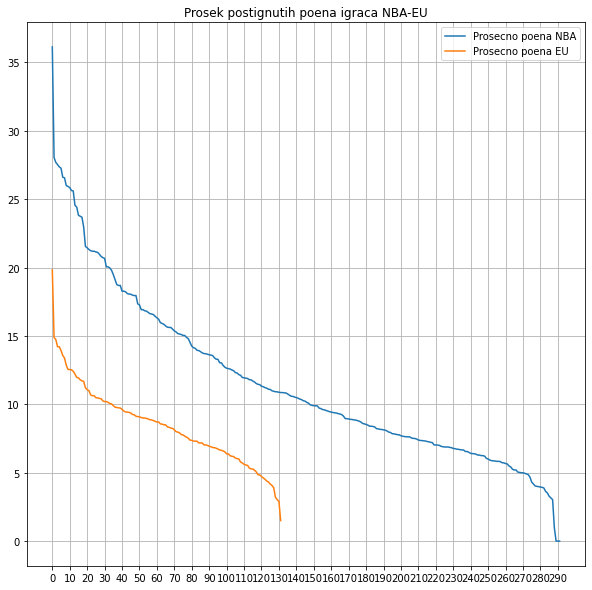

In [78]:
nba_reg_poeni_igraca['Prosecno poena NBA'].plot(figsize=(10,10), title='Prosek postignutih poena igraca NBA-EU')
eu_poeni_igraca['Prosecno poena EU'].plot()
plt.xticks(ticks=(range(0, 300, 10)))
plt.legend()
plt.grid()
plt.show()